In [12]:
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### for each dataset: dataframe with 3 columns: lp, io, k

In [1]:
import pickle

In [26]:
weights_bs = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('epithelial', 'fibroblast', 'immune').pickle", "rb")
)

In [27]:
weights_lp = pickle.load(
    open("pmd-permute/lp/uc-dialogue-reduced_ws_('epithelial', 'fibroblast', 'immune').pickle", "rb")
)

In [68]:
def _to_dataframe(scv_lp:np.array, scv_io:np.array, celltype):
    # for one celltype!
    def flat_list(scv:np.array):
        w = []
        for c in range(scv.shape[1]):
            w.append([x[c] for x in scv])
        scv_flat = [item for sublist in w for item in sublist]
        return scv_flat

    scv_flat_lp = flat_list(scv_lp)
    scv_flat_io = flat_list(scv_io)
    K = []
    for k in range(scv_lp.shape[1]):
        K.append(scv_lp.shape[0]* [k])
    K_flat = [item for sublist in K for item in sublist]

    Celltype = [celltype] * len(scv_flat_lp)

    correlation_dataframe = pd.DataFrame({"immune, fibroblast, epithelial":scv_flat_lp, "epithelial, fibroblast, immune":scv_flat_io, "MCP":K_flat, "celltype":Celltype})
    return correlation_dataframe
    

In [43]:
weights_lp = list(weights_lp.values())
weights_bs = list(weights_bs.values())

AttributeError: 'list' object has no attribute 'values'

In [44]:
celltype0 = _to_dataframe(weights_lp[0], weights_bs[0], "epithelial")
celltype1 = _to_dataframe(weights_lp[1], weights_bs[1], "fibroblast")
celltype2 = _to_dataframe(weights_lp[2], weights_bs[2], "immune")
my_data = celltype0.append(celltype1)
data_to_plot = my_data.append(celltype2)

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_6166/2812303863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_data = celltype0.append(celltype1)
/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_6166/2812303863.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_plot = my_data.append(celltype2)


In [45]:
data_to_plot

,linear programming,iterative optimization per dataset,MCP,celltype
0,0.084340,0.000000,0,epithelial
1,0.347479,0.432105,0,epithelial
2,-0.470768,-0.626747,0,epithelial
3,0.081603,0.013835,0,epithelial
4,0.076959,0.000000,0,epithelial
...,...,...,...,...
145,0.016808,0.000000,2,immune
146,-0.148327,0.003110,2,immune
147,0.071139,0.000000,2,immune
148,-0.075548,-0.000000,2,immune


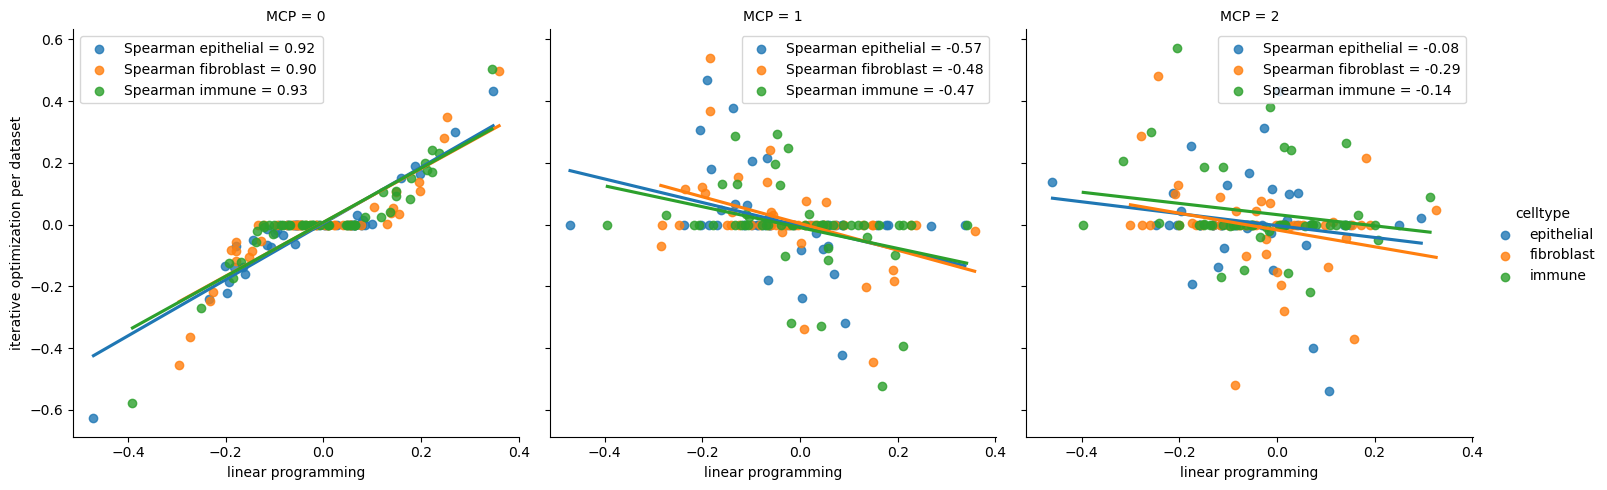

In [46]:
scv_cor = sns.lmplot(x="linear programming", y="iterative optimization per dataset", col="MCP", hue="celltype",ci=None, data=data_to_plot)
#add overall title to replot
#scv_cor.fig.suptitle('correlation of sparce canonical variates',y=1.05, fontsize=17)

for ax, k in zip(scv_cor.axes.flat, scv_cor.col_names):
    r_epi, pvalue = sc.stats.spearmanr(data_to_plot[(data_to_plot["MCP"]==k)&(data_to_plot["celltype"]=="epithelial")]['iterative optimization per dataset'], data_to_plot[(data_to_plot["MCP"]==k) & (data_to_plot["celltype"]=="epithelial")]["linear programming"])
    r_fib, pvalue = sc.stats.spearmanr(data_to_plot[(data_to_plot["MCP"]==k)&(data_to_plot["celltype"]=="fibroblast")]['iterative optimization per dataset'], data_to_plot[(data_to_plot["MCP"]==k) & (data_to_plot["celltype"]=="fibroblast")]["linear programming"])
    r_im, pvalue = sc.stats.spearmanr(data_to_plot[(data_to_plot["MCP"]==k)&(data_to_plot["celltype"]=="immune")]['iterative optimization per dataset'], data_to_plot[(data_to_plot["MCP"]==k) & (data_to_plot["celltype"]=="immune")]["linear programming"])
    
    ax.collections[0].set_label(f'Spearman epithelial = {r_epi:.2f}')
    ax.collections[1].set_label(f'Spearman fibroblast = {r_fib:.2f}')
    ax.collections[2].set_label(f'Spearman immune = {r_im:.2f}')
    ax.legend()

### permuted data

In [62]:
weights_io_efi = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('epithelial', 'fibroblast', 'immune').pickle", "rb")
)

In [63]:
weights_io_ife = pickle.load(
    open("pmd-permute/bs/uc-dialogue-reduced_ws_('immune', 'fibroblast', 'epithelial').pickle", "rb")
)

In [69]:
celltype0_ = _to_dataframe(weights_io_ife["epithelial"], weights_io_efi["epithelial"], "epithelial")
celltype1_ = _to_dataframe(weights_io_ife["fibroblast"], weights_io_efi["fibroblast"], "fibroblast")
celltype2_ = _to_dataframe(weights_io_ife["immune"], weights_io_efi["immune"], "immune")
my_data_ = celltype0_.append(celltype1_)
data_to_plot_ = my_data_.append(celltype2_)

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_6166/3292233575.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_data_ = celltype0_.append(celltype1_)
/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_6166/3292233575.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_plot_ = my_data_.append(celltype2_)


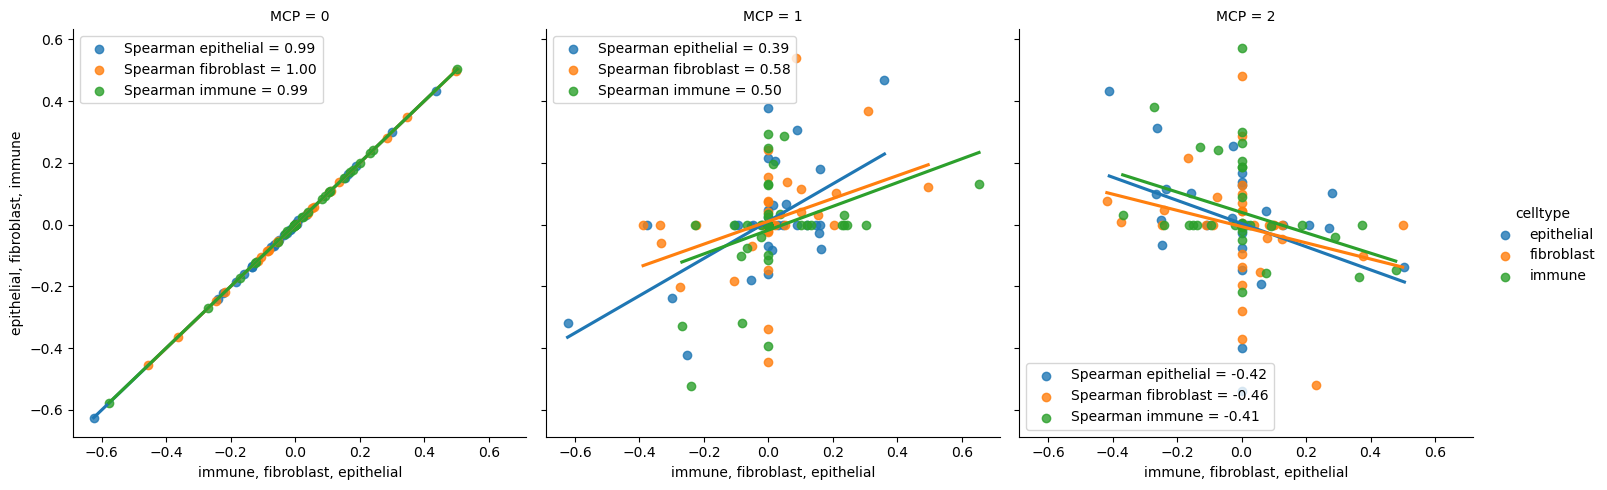

In [71]:
scv_cor = sns.lmplot(x="immune, fibroblast, epithelial", y="epithelial, fibroblast, immune", col="MCP", hue="celltype",ci=None, data=data_to_plot_)
#add overall title to replot
#scv_cor.fig.suptitle('correlation of sparce canonical variates',y=1.05, fontsize=17)

for ax, k in zip(scv_cor.axes.flat, scv_cor.col_names):
    r_epi, pvalue = sc.stats.spearmanr(data_to_plot_[(data_to_plot_["MCP"]==k)&(data_to_plot_["celltype"]=="epithelial")]["epithelial, fibroblast, immune"], data_to_plot_[(data_to_plot_["MCP"]==k) & (data_to_plot_["celltype"]=="epithelial")]["immune, fibroblast, epithelial"])
    r_fib, pvalue = sc.stats.spearmanr(data_to_plot_[(data_to_plot_["MCP"]==k)&(data_to_plot_["celltype"]=="fibroblast")]["epithelial, fibroblast, immune"], data_to_plot_[(data_to_plot_["MCP"]==k) & (data_to_plot_["celltype"]=="fibroblast")]["immune, fibroblast, epithelial"])
    r_im, pvalue = sc.stats.spearmanr(data_to_plot_[(data_to_plot_["MCP"]==k)&(data_to_plot_["celltype"]=="immune")]["epithelial, fibroblast, immune"], data_to_plot_[(data_to_plot_["MCP"]==k) & (data_to_plot_["celltype"]=="immune")]["immune, fibroblast, epithelial"])
    
    ax.collections[0].set_label(f'Spearman epithelial = {r_epi:.2f}')
    ax.collections[1].set_label(f'Spearman fibroblast = {r_fib:.2f}')
    ax.collections[2].set_label(f'Spearman immune = {r_im:.2f}')
    ax.legend()